In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [3]:
from CALIBRATION import filedata, readfiles,ScatterPlotVariables, ScatterPlotVariablesperday, LinearRegressionModel, PolynomialRegressionModel,  HuberRegressionModel
file_NO2 = filedata('2019-08-15-NO2-Final.xlsx', 'Base')
# Read data from fike
day, X, y, dataframe = readfiles(file_NO2)

In [117]:
#ScatterPlotVariablesperday(day, X,y,dataframe.columns[1:-1]);  plt.show()

In [120]:
# Check multicollinerity

# Calculate the correlation matrix
#corr = dataframe.corr()
#display(corr)
# correlation heatmap
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')
# Scatter plot for multicollinearity
#pd.plotting.scatter_matrix(dataframe, alpha=1, figsize = (30,20))
#plt.show()

## Select day 4

In [4]:
dataframe = dataframe[dataframe['Day']==4]
dataframe_before = dataframe
#dataframe_after = dataframe
dataframe_after = dataframe.drop(['Day'], axis=1)

#X1 = sm.tools.add_constant(dataframe_before)
#X2 = sm.tools.add_constant(dataframe_after)

#series_before = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],index = X1.columns)
#series_after = pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])],index = X2.columns)

#print("DATA BEFORE")
#print('-'*100)
#display(series_before)

#print("DATA AFTER")
#print('-'*100)
#display(series_after)

In [5]:
# Describe de data set
#desc_df = dataframe.describe()

#desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std']*3)
#desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std']*3)

#desc_df


In [7]:
# Removing outliers using zscore
dataframe_remove = dataframe_after[(np.abs(stats.zscore(dataframe_after)) < 3).all(axis = 1)]
dataframe_after.index.difference(dataframe_remove.index)

Int64Index([155], dtype='int64')

# Linear Regression model

In [10]:
# Build the model using sklearn
X = dataframe_remove.drop('NO2 ppb', axis=1)
y = dataframe_remove['NO2 ppb']

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 1)

# Create Linear Regression model object
model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train, y_train)

intercept = model_lin_reg.intercept_
coefficient = model_lin_reg.coef_

print("The intercept of our linear regression model is {:.5f}".format(intercept))
for coef in zip(X.columns, model_lin_reg.coef_):
    print("The coefficient for {} is {:.5f}".format(coef[0], coef[1]))
    
# Prediction plot X_test 
#y_pred = model_lin_reg.predict(X_test)

#model_mse = mean_squared_error(y_test, y_pred)
#model_r2 = r2_score(y_test, y_pred)

#plt.scatter(X_test['NO_We'], y_test )
#print(model_mse, model_r2)

#import pickle
#with open('my_multilinear_regression_NO.sav','wb') as f:
#    pickle.dump(model_lin_reg,f)

The intercept of our linear regression model is -102.42658
The coefficient for Humidity is -0.48616
The coefficient for Temperature is -0.51574
The coefficient for NO2_We is 2163.29573
The coefficient for NO2_Aux is -2349.86011
The coefficient for O3_We is -591.52991
The coefficient for O3_Aux is 1476.38086


## Linear Model with sm

In [13]:
# define output
#X2 = sm.add_constant(X)
# create model with OLS
model_lin_reg_2 = sm.OLS(y, X)
# fir the data
est = model_lin_reg_2.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                NO2 ppb   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     98.71
Date:                Fri, 16 Aug 2019   Prob (F-statistic):           1.22e-26
Time:                        22:16:28   Log-Likelihood:                -149.09
No. Observations:                  58   AIC:                             310.2
Df Residuals:                      52   BIC:                             322.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Humidity       -0.4257      0.070     -6.056      

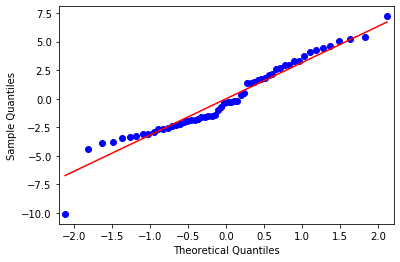

The mean of the residuals is -0.005768


In [14]:
# check normality of Residuals
import pylab
sm.qqplot(est.resid, line='s')
pylab.show()
mean_residuals = sum(est.resid)/len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [237]:
# Elliminate insignificant variables
#dataframe_remove_2 = dataframe_remove.drop('Humidity', axis=1)
#X = dataframe_remove_2.drop('NO_ppb', axis=1)
#print(X)
#y = dataframe_remove_2['NO_ppb']
#print(y)
# define output
#X2 = sm.add_constant(X)
# create model with OLS
#model_lin_reg_2 = sm.OLS(y, X)
# fir the data
#est = model_lin_reg_2.fit()
#print(est.summary())

# Polynomial Regression

In [16]:
poly_2 = PolynomialFeatures(degree=2, interaction_only=False,include_bias=False)
X_poly_2 = poly_2.fit_transform(X)
print(poly_2.get_feature_names())
model_poly_2 = LinearRegression(fit_intercept =False, normalize = True)

model_poly_2.fit(X_poly_2, y)
r_sq = model_poly_2.score(X_poly_2, y)
#print('coefficient of determination:', r_sq)
#print('intercept:', model_poly_2.intercept_)
#print('slope:', model_poly_2.coef_)
    
#X2_ = sm.add_constant(X_poly_2)
est = sm.OLS(y, X_poly_2).fit()
#print(est.summary(xname=['Humidity', 'Temperature', 'NO_We', 'NO_Aux', 'Humidity^2', 'Humidity*Temperature', 'Humidity*NO_We', 'Humidity*NO_Aux','Temperature^2', 'Temperature*NO_We', 'Temperature*NO_Aux', 'NO_We^2','NO_We*NO_Aux', 'NO_Aux^2']))
print(est.summary())

['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x3^2', 'x3 x4', 'x3 x5', 'x4^2', 'x4 x5', 'x5^2']
                            OLS Regression Results                            
Dep. Variable:                NO2 ppb   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     70.97
Date:                Fri, 16 Aug 2019   Prob (F-statistic):           3.84e-21
Time:                        22:16:53   Log-Likelihood:                -102.02
No. Observations:                  58   AIC:                             258.0
Df Residuals:                      31   BIC:                             313.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                